## Введение
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».\
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.\
\
Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Удой, кг` — масса молока, которую корова даёт в год (в килограммах).\
`ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.\
`Сырой протеин, г` — содержание сырого протеина в корме (в граммах).\
`СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Жирность,%` — содержание жиров в молоке (в процентах).\
`Белок,%` — содержание белков в молоке (в процентах).\
`Вкус молока`— оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).\
\
Признаки в датасете `ferma_main.csv` можно разделить на группы.\
Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`\
Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.\
Характеристика пастбища: `Тип пастбища`.\
Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.\
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.\
\
Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:\
`id` — уникальный идентификатор коровы.\
`Имя Папы` — имя папы коровы.\
\
Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:\
`Порода` — порода коровы.\
`Тип пастбища` — ландшафт лугов, на которых паслась корова.\
`порода папы_быка` — порода папы коровы.\
`Имя_папы` — имя папы коровы.\
`Текущая_жирность,%` — содержание жиров в молоке (в процентах).\
`Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).\
`Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [1]:
!pip install scikit-learn==1.5.0 -q
!pip install phik -q

Found existing installation: scikit-learn 0.24.1
Uninstalling scikit-learn-0.24.1:
  Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 13.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 62.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Импортирование библиотек

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix

Загрузка данных 'ferma_main.csv'

In [4]:
try:
    ferma_main=pd.read_csv('/datasets/ferma_main.csv', delimiter=';')
except FileNotFoundError:
    ferma_main=pd.read_csv('ferma_main.csv', delimiter=';')

Загрузка данных 'ferma_dad.csv'

In [5]:
try:
    ferma_dad=pd.read_csv('/datasets/ferma_dad.csv', delimiter=';')
except FileNotFoundError:
    ferma_dad=pd.read_csv('ferma_dad.csv', delimiter=';')

Загрузка данных 'cow_buy.csv'

In [6]:
try:
    cow_buy=pd.read_csv('/datasets/cow_buy.csv', delimiter=';')
except FileNotFoundError:
    cow_buy=pd.read_csv('cow_buy.csv', delimiter=';')

<b>Вывод:</b>

    - Были импортированы все библиотеки для их дальнейшего использования
    - Были загружены датасеты 
        1)ferma_main.csv 
        2)ferma_dad.csv 
        3)cow_buy.csv 

##  Предобработка данных

Обьединение данных ferma_main и ferma_dad

In [7]:
ferma_main_dad=pd.merge(ferma_main, ferma_dad, how='left', on='id')

In [8]:
ferma_main_dad.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет,Буйный
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет,Соловчик
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет,Барин
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет,Буйный
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет,Барин


Просмотр информации о данных ferma_main

In [9]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Просмотр первых пяти строк в ferma_main

In [10]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


По данным можно сразу сказать, что столбик id лишний, явных пропусков нет, тип обьектов нужно поменять

Проверка на пропуски

In [11]:
ferma_main.isnull().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

Просмотр последних пяти строк в ferma_main

In [12]:
ferma_main.tail()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


Удаление столбца 'id' из данных

In [13]:
ferma_main.drop(columns=['id'], inplace=True)

Просмотр информации о данных ferma_dad

In [14]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


По данным можно сразу сказать, строк меньше чем в предыдущем датафрейме, явных пропусков нет, столбик id нужно удалить

Просмотр первых пяти строк в ferma_dad

In [15]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Просмотр последних пяти строк в ferma_dad

In [16]:
ferma_dad.tail()

,id,Имя Папы
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин
628,629,Соловчик


Проверка на пропуски

In [17]:
ferma_dad.isnull().sum()

id          0
Имя Папы    0
dtype: int64

Удаление столбика 'id'

In [18]:
ferma_dad.drop(columns=['id'], inplace=True)

Проверка

In [19]:
ferma_dad.head()

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин


Просмотр информации о данных cow_buy

In [20]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


По данным можно сразу сказать, что строк гораздо меньше чем в предыдущих данных, тип обьектов нужно поменять

Вывод всех строк cow_buy

In [21]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Проверка на пропуски

In [22]:
cow_buy.isnull().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

Для дальнейшего редактирования данных выведем 10 первых строк данных

In [23]:
ferma_main.head(10)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


Просмотр уникальных значений столбца 'ЭКЕ (Энергетическая кормовая единица)'

In [24]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [25]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main['ЭКЕ (Энергетическая кормовая единица)']=ferma_main['ЭКЕ (Энергетическая кормовая единица)'].astype(float)

In [26]:
ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'] = ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'].str.replace(',', '.')
ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)']=ferma_main_dad['ЭКЕ (Энергетическая кормовая единица)'].astype(float)

Просмотр уникальных значений столбца 'СПО (Сахаро-протеиновое соотношение)'

In [27]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].unique()

array(['0,89', '0,885', '0,93', '0,94', '0,895', '0,95', '0,96', '0,85',
       '0,84', '0,86', '0,88', '0,9'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [28]:
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].str.replace(',','.')
ferma_main['СПО (Сахаро-протеиновое соотношение)']=ferma_main['СПО (Сахаро-протеиновое соотношение)'].astype(float)

In [29]:
ferma_main_dad['СПО (Сахаро-протеиновое соотношение)']=ferma_main_dad['СПО (Сахаро-протеиновое соотношение)'].str.replace(',','.')
ferma_main_dad['СПО (Сахаро-протеиновое соотношение)']=ferma_main_dad['СПО (Сахаро-протеиновое соотношение)'].astype(float)

Просмотр уникальных значений столбца 'Жирность,%'

In [30]:
ferma_main['Жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,73', '3,13', '3,48', '3,55',
       '3,71', '3,72', '3,61', '3,22', '3,03', '3,49', '3,31', '3,7',
       '3,74', '3,21', '3,11', '3,25', '3,34', '3,24', '3,53', '3,16',
       '3,26', '3,57', '3,44', '3,38', '3,18', '3,42', '3,62', '3,75',
       '3,41', '3,27', '3,63', '3,12', '3,64', '3,69', '3,37', '3,65',
       '3,33', '3,28', '3,35', '3,32', '3,23', '3,15', '3,01', '2,99',
       '3,39', '3,19'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [31]:
ferma_main['Жирность,%']=ferma_main['Жирность,%'].str.replace(',','.')
ferma_main['Жирность,%']=ferma_main['Жирность,%'].astype(float)

In [32]:
ferma_main_dad['Жирность,%']=ferma_main_dad['Жирность,%'].str.replace(',','.')
ferma_main_dad['Жирность,%']=ferma_main_dad['Жирность,%'].astype(float)

Просмотр уникальных значений столбца 'Белок,%'

In [33]:
ferma_main['Белок,%'].unique()

array(['3,076', '3,079', '3,074', '3,075', '3,073', '3,078', '3,077',
       '3,071', '3,08', '3,072', '3,081', '3,082', '3,07', '3,069',
       '3,085'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float' в таблицах ferma_main и ferma_main_dad

In [34]:
ferma_main['Белок,%']=ferma_main['Белок,%'].str.replace(',','.')
ferma_main['Белок,%']=ferma_main['Белок,%'].astype(float)

In [35]:
ferma_main_dad['Белок,%']=ferma_main_dad['Белок,%'].str.replace(',','.')
ferma_main_dad['Белок,%']=ferma_main_dad['Белок,%'].astype(float)

Просмотр уникальных значений столбца 'Порода'

In [36]:
ferma_main['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Просмотр уникальных значений столбца 'Тип пастбища'

In [37]:
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

Удаление неявных дубликатов (замена названия 'Равнинные' на 'Равнинное') и вывод результата

In [38]:
ferma_main['Тип пастбища']=ferma_main['Тип пастбища'].str.replace('Равнинные','Равнинное')
ferma_main['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [39]:
ferma_main_dad['Тип пастбища']=ferma_main_dad['Тип пастбища'].str.replace('Равнинные','Равнинное')

Просмотр уникальных значений столбца 'порода папы_быка'

In [40]:
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

Просмотр количества значений для определения как правильно писать Айдиал или Айдиалл

In [41]:
ferma_main['порода папы_быка'].value_counts()

Соверин    316
Айдиал     240
Айдиалл     78
Name: порода папы_быка, dtype: int64

Удаление неявных дубликатов (замена названия 'Айдиалл' на 'Айдиал') и вывод результата в таблицах ferma_main и ferma_main_dad

In [42]:
ferma_main['порода папы_быка']=ferma_main['порода папы_быка'].str.replace('Айдиалл','Айдиал')
ferma_main['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [43]:
ferma_main_dad['порода папы_быка']=ferma_main_dad['порода папы_быка'].str.replace('Айдиалл','Айдиал')

просмотр информации ferma_main_dad

In [44]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Просмотр уникальных значений столбца 'Вкус молока'

In [45]:
ferma_main['Вкус молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

Просмотр уникальных значений столбца 'Возраст'

In [46]:
ferma_main['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименования столбцов

In [47]:
ferma_main.rename(columns={'Удой, кг':'удой_кг', 
                           'ЭКЕ (Энергетическая кормовая единица)':'энергетическая_кормовая_единица', 
                           'Сырой протеин, г':'сырой_протеин_г', 
                           'СПО (Сахаро-протеиновое соотношение)':'сахаро_протеиновое_соотношение', 
                           'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка',
                           'Жирность,%':'процент_жирности',
                           'Белок,%':'процент_белка',
                           'Вкус молока':'вкус_молока',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод результатов проделанных изменений с таблицой 'ferma_main'

In [48]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          634 non-null    int64  
 1   энергетическая_кормовая_единица  634 non-null    float64
 2   сырой_протеин_г                  634 non-null    int64  
 3   сахаро_протеиновое_соотношение   634 non-null    float64
 4   порода                           634 non-null    object 
 5   тип_пастбища                     634 non-null    object 
 6   порода_папы_быка                 634 non-null    object 
 7   процент_жирности                 634 non-null    float64
 8   процент_белка                    634 non-null    float64
 9   вкус_молока                      634 non-null    object 
 10  возраст                          634 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 54.6+ KB


Вывод таблицы 'ferma_dad' для обнаружения явных проблем

In [49]:
ferma_dad

,Имя Папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


Переименования столбца 'Имя Папы' на 'имя_папы'

In [50]:
ferma_dad.rename(columns={'Имя Папы':'имя_папы'}, inplace=True)

Прсмотр уникальных значений

In [51]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Вывод таблицы 'cow_buy' для дальшейшей работы с ней

In [52]:
cow_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Вывод уникальных значений в столбце 'Текущая_жирность,%'

In [53]:
cow_buy['Текущая_жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,64', '3,63', '3,57', '3,73',
       '3,68', '3,42', '3,77', '3,34'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [54]:
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].str.replace(',','.')
cow_buy['Текущая_жирность,%']=cow_buy['Текущая_жирность,%'].astype(float)

Вывод уникальных значений в столбце 'Текущий_уровень_белок,%'

In [55]:
cow_buy['Текущий_уровень_белок,%'].unique()

array(['3,076', '3,081', '3,074', '3,061', '3,053', '3,079', '3,055',
       '3,073', '3,046', '3,075', '3,065', '3,069'], dtype=object)

Замена запятых на точки, для того чтобы изменить тип данных в столбце на 'float'

In [56]:
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].str.replace(',','.')
cow_buy['Текущий_уровень_белок,%']=cow_buy['Текущий_уровень_белок,%'].astype(float)

Вывод уникальных значений в столбце 'Порода'

In [57]:
cow_buy['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

Вывод уникальных значений в столбце 'Тип пастбища'

In [58]:
cow_buy['Тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

Вывод уникальных значений в столбце 'порода папы_быка'

In [59]:
cow_buy['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод уникальных значений в столбце 'имя папы'

In [60]:
cow_buy['Имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Вывод уникальных значений в столбце 'Возраст'

In [61]:
cow_buy['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

Переименование столбцов

In [62]:
cow_buy.rename(columns={'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка', 
                           'Имя_папы':'имя_папы',
                           'Текущая_жирность,%':'процент_жирности',
                           'Текущий_уровень_белок,%':'процент_белка',
                           'Возраст':'возраст'
                          }, inplace=True)

Вывод информации после проделанной работы

In [63]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   процент_жирности  20 non-null     float64
 5   процент_белка     20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Количество дубликатов в 'ferma_main'

In [64]:
ferma_main.duplicated().sum()

5

Удаление дубликатов

In [65]:
ferma_main=ferma_main.drop_duplicates()

In [66]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          629 non-null    int64  
 1   энергетическая_кормовая_единица  629 non-null    float64
 2   сырой_протеин_г                  629 non-null    int64  
 3   сахаро_протеиновое_соотношение   629 non-null    float64
 4   порода                           629 non-null    object 
 5   тип_пастбища                     629 non-null    object 
 6   порода_папы_быка                 629 non-null    object 
 7   процент_жирности                 629 non-null    float64
 8   процент_белка                    629 non-null    float64
 9   вкус_молока                      629 non-null    object 
 10  возраст                          629 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 59.0+ KB


Количество дубликатов в 'cow_buy'

In [67]:
cow_buy.duplicated().sum()

4

Удаление дубликатов

Количество дубликатов в 'ferma_dad'

In [69]:
ferma_dad.duplicated().sum()

625

Могу предположить что это дубликаты которые не надо удалять

In [70]:
ferma_dad

,имя_папы
0,Буйный
1,Соловчик
2,Барин
3,Буйный
4,Барин
...,...
624,Буйный
625,Барин
626,Барин
627,Барин


In [71]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          629 non-null    int64  
 1   энергетическая_кормовая_единица  629 non-null    float64
 2   сырой_протеин_г                  629 non-null    int64  
 3   сахаро_протеиновое_соотношение   629 non-null    float64
 4   порода                           629 non-null    object 
 5   тип_пастбища                     629 non-null    object 
 6   порода_папы_быка                 629 non-null    object 
 7   процент_жирности                 629 non-null    float64
 8   процент_белка                    629 non-null    float64
 9   вкус_молока                      629 non-null    object 
 10  возраст                          629 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 59.0+ KB


In [72]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   имя_папы  629 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


In [73]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

количество дубликатов

In [74]:
ferma_main_dad.duplicated().sum()

5

Удаление дубликатов

In [75]:
ferma_main_dad=ferma_main_dad.drop_duplicates()

In [76]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

In [77]:
ferma_main_dad.rename(columns={'Удой, кг':'удой_кг', 
                           'ЭКЕ (Энергетическая кормовая единица)':'энергетическая_кормовая_единица', 
                           'Сырой протеин, г':'сырой_протеин_г', 
                           'СПО (Сахаро-протеиновое соотношение)':'сахаро_протеиновое_соотношение', 
                           'Порода':'порода', 
                           'Тип пастбища':'тип_пастбища', 
                           'порода папы_быка':'порода_папы_быка',
                           'Жирность,%':'процент_жирности',
                           'Белок,%':'процент_белка',
                           'Вкус молока':'вкус_молока',
                           'Возраст':'возраст',
                            'Имя Папы':'имя_папы'
                          }, inplace=True)

<b>Вывод:</b>

    - Неявные пропуски были заменены
    - Были изменены типы данных, там где это было надо
    - Пропусков в данных не обнаружено
    - Названия столбиков были приведены в змеиный регистр
    - Был удален столбик 'id'
    - Дубликаты были удалены
    - Создана таблица которая включает в себя ferma_main и ferma_dad

## Исследовательский анализ данных

Выведем описательную статистику 'ferma_main'

In [78]:
ferma_main.describe()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,процент_жирности,процент_белка
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Можно заметить большой выброс в столбце 'удой'

Выведем описательную статистику 'cow_buy'

In [79]:
cow_buy.describe()

,процент_жирности,процент_белка
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Построим боксплот для столбца 'удой'

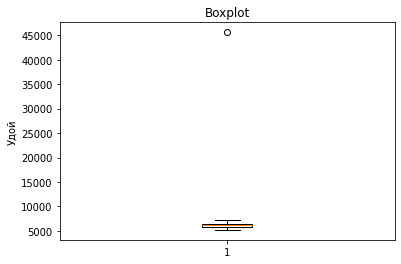

In [80]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Так же можно заметить выюрос в данных

Просмотр уникальных значений

In [81]:
ferma_main['удой_кг'].sort_values(ascending=False)

16     45616
70      7222
135     7207
296     7201
294     7197
       ...  
578     5235
322     5215
589     5213
397     5207
273     5204
Name: удой_кг, Length: 629, dtype: int64

Просмотр строчки с выбросом

In [82]:
ferma_main.loc[ferma_main['удой_кг']==45616]

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
16,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [83]:
ferma_main_dad=ferma_main_dad.loc[ferma_main_dad['удой_кг']!=45616]

Удалим данную строчку

In [84]:
ferma_main=ferma_main.loc[ferma_main['удой_кг']!=45616]

In [85]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          628 non-null    int64  
 1   энергетическая_кормовая_единица  628 non-null    float64
 2   сырой_протеин_г                  628 non-null    int64  
 3   сахаро_протеиновое_соотношение   628 non-null    float64
 4   порода                           628 non-null    object 
 5   тип_пастбища                     628 non-null    object 
 6   порода_папы_быка                 628 non-null    object 
 7   процент_жирности                 628 non-null    float64
 8   процент_белка                    628 non-null    float64
 9   вкус_молока                      628 non-null    object 
 10  возраст                          628 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 58.9+ KB


In [86]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               628 non-null    int64  
 1   удой_кг                          628 non-null    int64  
 2   энергетическая_кормовая_единица  628 non-null    float64
 3   сырой_протеин_г                  628 non-null    int64  
 4   сахаро_протеиновое_соотношение   628 non-null    float64
 5   порода                           628 non-null    object 
 6   тип_пастбища                     628 non-null    object 
 7   порода_папы_быка                 628 non-null    object 
 8   процент_жирности                 628 non-null    float64
 9   процент_белка                    628 non-null    float64
 10  вкус_молока                      628 non-null    object 
 11  возраст                          628 non-null    object 
 12  имя_папы              

Выведем результат

In [87]:
ferma_main['удой_кг'].sort_values(ascending=False)

70     7222
135    7207
296    7201
294    7197
593    7174
       ... 
578    5235
322    5215
589    5213
397    5207
273    5204
Name: удой_кг, Length: 628, dtype: int64

построим боксплот для столбика 'удой_кг' для просмотра изменений

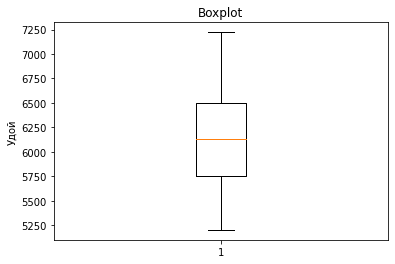

In [88]:
plt.boxplot(ferma_main['удой_кг'])
plt.title('Boxplot')
plt.ylabel('Удой');

Построим гистограмму для наглядного представления данных

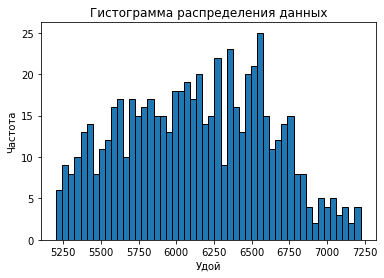

In [89]:
plt.hist(ferma_main['удой_кг'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Удой')
plt.ylabel('Частота');

Построим боксплот для стобца 'энергетическая_кормовая_единица'

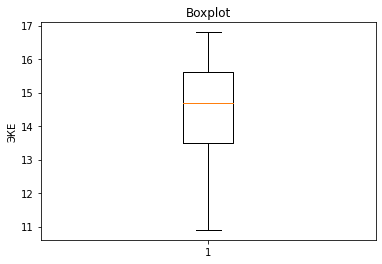

In [90]:
plt.boxplot(ferma_main['энергетическая_кормовая_единица'])
plt.title('Boxplot')
plt.ylabel('ЭКЕ');

Построим гистограмму для наглядного представления данных

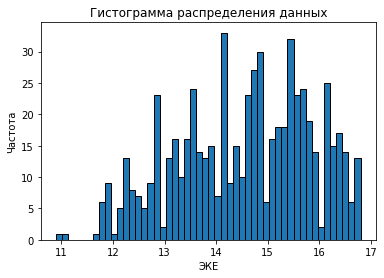

In [91]:
plt.hist(ferma_main['энергетическая_кормовая_единица'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('ЭКЕ')
plt.ylabel('Частота');

Построим боксплот для стобца 'сырой_протеин_г'

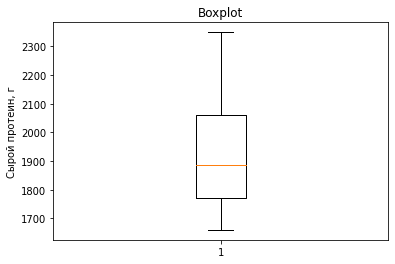

In [92]:
plt.boxplot(ferma_main['сырой_протеин_г'])
plt.title('Boxplot')
plt.ylabel('Сырой протеин, г');

Построим гистограмму для наглядного представления данных

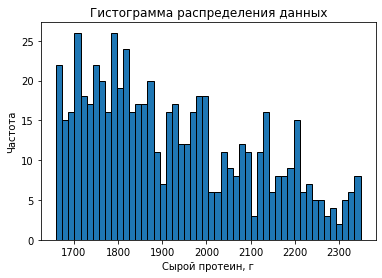

In [93]:
plt.hist(ferma_main['сырой_протеин_г'], bins=50, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Частота');

Построим боксплот для стобца 'сахаро_протеиновое_соотношение'

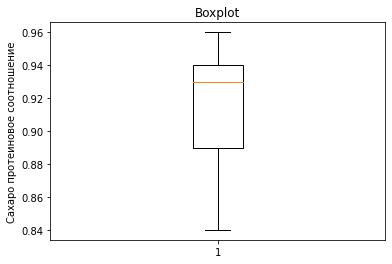

In [94]:
plt.boxplot(ferma_main['сахаро_протеиновое_соотношение'])
plt.title('Boxplot')
plt.ylabel('Сахаро протеиновое соотношение');

Построим гистограмму для наглядного представления данных

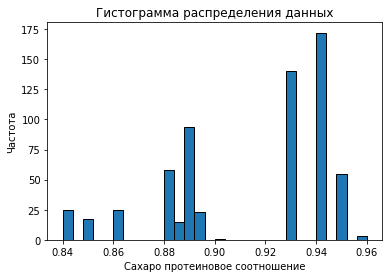

In [95]:
plt.hist(ferma_main['сахаро_протеиновое_соотношение'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Сахаро протеиновое соотношение')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'порода'

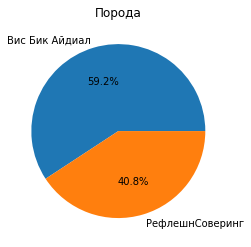

In [96]:
circle=ferma_main['порода'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода');

Построим диаграмму для вывода процентного соотношения столбца 'тип_пастбища'

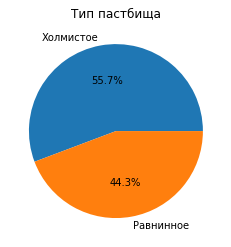

In [97]:
circle=ferma_main['тип_пастбища'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Тип пастбища');

Построим диаграмму для вывода процентного соотношения столбца 'порода_папы_быка'

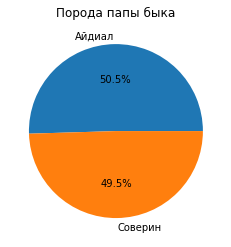

In [98]:
circle=ferma_main['порода_папы_быка'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Порода папы быка');

Построим боксплот для стобца 'процент_жирности'

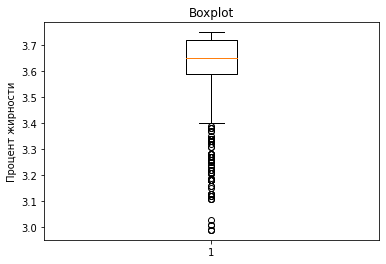

In [99]:
plt.boxplot(ferma_main['процент_жирности'])
plt.title('Boxplot')
plt.ylabel('Процент жирности');

Построим гистограмму для наглядного представления данных

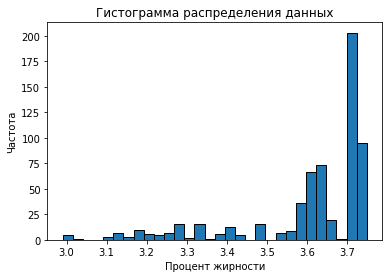

In [100]:
plt.hist(ferma_main['процент_жирности'], bins=30, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент жирности')
plt.ylabel('Частота');

Построим боксплот для стобца 'процент_белка'

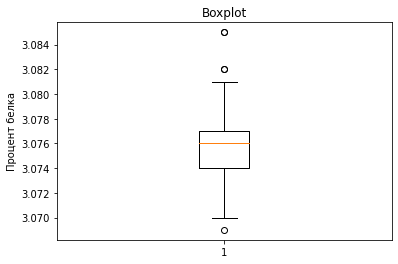

In [101]:
plt.boxplot(ferma_main['процент_белка'])
plt.title('Boxplot')
plt.ylabel('Процент белка');

Построим гистограмму для наглядного представления данных

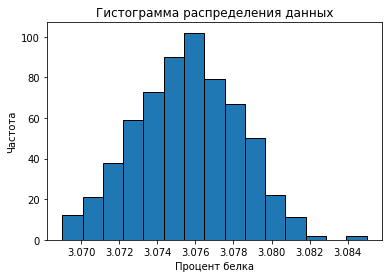

In [102]:
plt.hist(ferma_main['процент_белка'], bins=15, edgecolor='black')
plt.title('Гистограмма распределения данных')
plt.xlabel('Процент белка')
plt.ylabel('Частота');

Построим диаграмму для вывода процентного соотношения столбца 'вкус_молока'

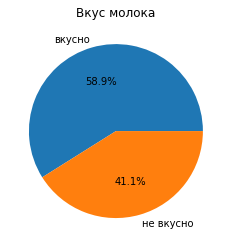

In [103]:
circle=ferma_main['вкус_молока'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Вкус молока');

Построим диаграмму для вывода процентного соотношения столбца 'возраст'

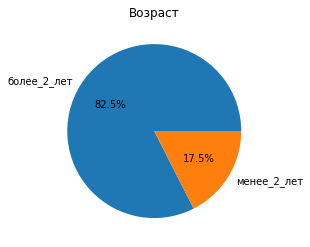

In [104]:
circle=ferma_main['возраст'].value_counts(normalize=True)*100
plt.pie(circle, labels=circle.index, autopct='%1.1f%%')
plt.title('Возраст');

<b>Вывод:</b>

- Проведение анализа всех признаков, включая количественные и категориальные. Для количественных признаков были построены гистограммы, ящики с усами, а для категориальных - круговые диаграммы.

- Для признака "Удой, кг" был обнаружен выброс, однако после его удаления распределение признака напоминает нормальное с небольшими перепадами вверх/вниз.

- Для признаков "ЭКЕ", "Сырой протеин" и "СПО" выбросов не было обнаружено. Медианные значения для них соответственно - 14.7, 188 и 0.93.

- Для категориального признака "Порода" большая часть коров относится к породе "Вис Бик Айдиал".

- Для признака "Тип пастбища" большая часть пастбищ является холмистыми.

- Для признака "Порода папы быка" породы распределены равномерно.

- Для признака "Жирность" медианное значение - 3.65. Есть значения, которые сильно выделяются (жирность менее 3.4%), однако, молоко с жирностью 3% это нормально, поэтому удаление выбросов не было произведено.

- Для признака "Белок" были обнаружены 3 значения, которые могут считаться выбросами, но они не сильно отличаются от остальных значений, поэтому удаление их не было произведено. Медианное значение - 3.076.

- Более 60% молока считается вкусным.

- Более 80% коров имеет возраст более 2 лет.

## Корреляционный анализ

Построим матрицу корреляции для 'ferma_main'

In [105]:
interval_cols = ['удой_кг', 'энергетическая_кормовая_единица', 'сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'процент_жирности', 'процент_белка']

In [106]:
phik_matrix=ferma_main.phik_matrix(interval_cols=interval_cols)
phik_matrix

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
удой_кг,1.000000,0.720719,0.463224,0.661359,0.164744,0.279540,0.519915,0.707654,0.058970,0.173122,0.998101
энергетическая_кормовая_единица,0.720719,1.000000,0.456484,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
сырой_протеин_г,0.463224,0.456484,1.000000,0.387188,0.090925,0.096474,0.000000,0.397380,0.202474,0.176480,0.351685
сахаро_протеиновое_соотношение,0.661359,0.591190,0.387188,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.164744,0.123086,0.090925,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
тип_пастбища,0.279540,0.106758,0.096474,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода_папы_быка,0.519915,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
процент_жирности,0.707654,0.715914,0.397380,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
процент_белка,0.058970,0.000000,0.202474,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000
вкус_молока,0.173122,0.272265,0.176480,0.572702,0.000000,0.269063,0.000000,0.198793,0.143857,1.000000,0.165974


для наглядности выведем тепловую карту 

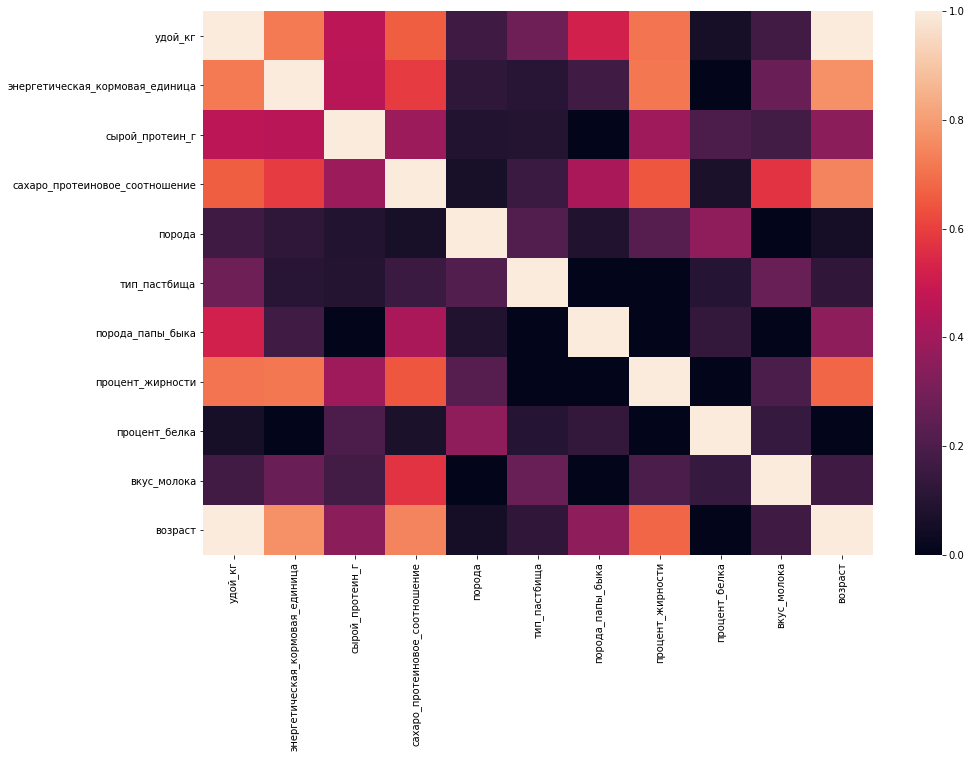

In [107]:
plt.figure(figsize = (15,10))
sns.heatmap(phik_matrix);

Построим точечные диаграммы:
- Удой и ЭКЕ;
- Удой и сахаро протеиновое соотношение;
- Удой и % жирности.

Text(0.5, 1.0, 'Точечная диаграмма для удой_кг 3')

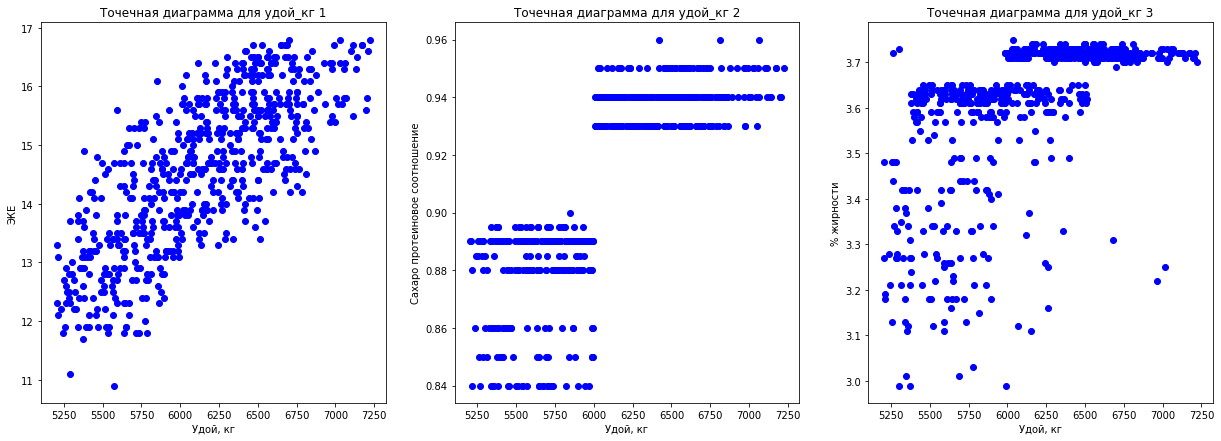

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# Первый график
axs[0].scatter(ferma_main['удой_кг'], ferma_main['энергетическая_кормовая_единица'], c='blue')
axs[0].set_xlabel('Удой, кг')
axs[0].set_ylabel('ЭКЕ')
axs[0].set_title('Точечная диаграмма для удой_кг 1')

# Второй график
axs[1].scatter(ferma_main['удой_кг'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[1].set_xlabel('Удой, кг')
axs[1].set_ylabel('Сахаро протеиновое соотношение')
axs[1].set_title('Точечная диаграмма для удой_кг 2')

# Третий график
axs[2].scatter(ferma_main['удой_кг'], ferma_main['процент_жирности'], c='blue')
axs[2].set_xlabel('Удой, кг')
axs[2].set_ylabel('% жирности')
axs[2].set_title('Точечная диаграмма для удой_кг 3')

In [109]:
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [110]:
ferma_main['сахаро_протеиновое_соотношение'].unique()

array([0.89 , 0.885, 0.93 , 0.94 , 0.895, 0.95 , 0.96 , 0.85 , 0.84 ,
       0.86 , 0.88 , 0.9  ])

Точечные диаграммы для:
- ЭКЕ и сахаро протеиновое соотношение;
- ЭКЕ и % жирности.

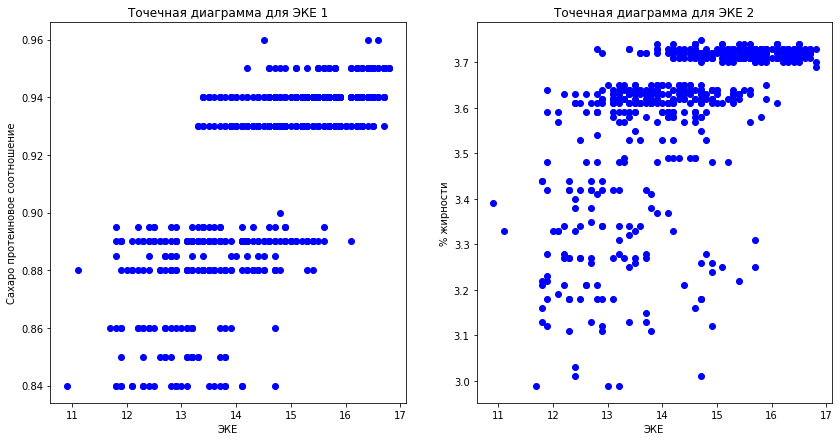

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Первый график
axs[0].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['сахаро_протеиновое_соотношение'], c='blue')
axs[0].set_xlabel('ЭКЕ')
axs[0].set_ylabel('Сахаро протеиновое соотношение')
axs[0].set_title('Точечная диаграмма для ЭКЕ 1')

# Второй график
axs[1].scatter(ferma_main['энергетическая_кормовая_единица'], ferma_main['процент_жирности'], c='blue')
axs[1].set_xlabel('ЭКЕ')
axs[1].set_ylabel('% жирности')
axs[1].set_title('Точечная диаграмма для ЭКЕ 2');

И точечная диаграмма для:
- Сахаро протеиновое соотношение и % жирности.

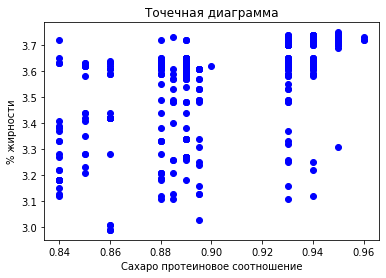

In [112]:
plt.scatter(ferma_main['сахаро_протеиновое_соотношение'], ferma_main['процент_жирности'], c='blue')
plt.xlabel('Cахаро протеиновое соотношение')
plt.ylabel('% жирности')
plt.title('Точечная диаграмма');

<b>Вывод:</b>
Можно заметить что присутствуют сильные корреляции:
- Удой и ЭКЕ;
- Удой и сахаро протеиновое соотношение;
- Удой и % жирности;
- ЭКЕ и сахаро протеиновое соотношение;
- ЭКЕ и % жирности;
- Сахаро протеиновое соотношение и % жирности.

## Обучение модели линейной регрессии

Построим модель машинного обучения. При этом уберем столбцы которые не влияют на количество удоя.

In [113]:
y = ferma_main['удой_кг']
X = ferma_main.drop(columns=['удой_кг', 'процент_жирности', 'процент_белка', 'вкус_молока'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#разбиение столбцов на категориальные и числовые

numeric_columns=['энергетическая_кормовая_единица','сырой_протеин_г','сахаро_протеиновое_соотношение']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст']

#преобразование категориальных данных

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)

#преобразование числовых данных

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

#обучение модели

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

#вывод r^2

r2 = r2_score(y_test, predictions) 
r2

0.7844078173416967

Вывод коэффициент MAE

In [114]:
mae=mean_absolute_error(y_test, predictions)
mae

164.24194463474925

Вывод коэффициент MSE

In [115]:
mse=mean_squared_error(y_test, predictions)
mse

43887.015009660514

Вывод коэффициент RMSE

In [116]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


209.4922791170608

In [117]:
residuals = y_test - predictions

Построение гистограммы

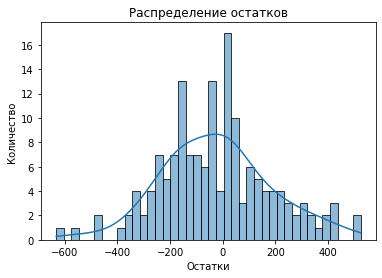

In [118]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

На графике можно заметить что гистограмма увеличивает значения

Построение точечной диаграммы

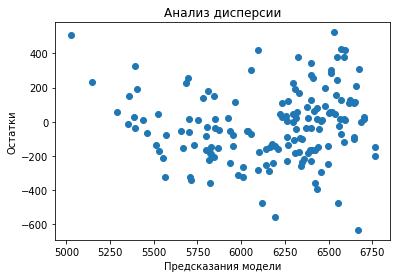

In [119]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

График боксплота

Text(0.5, 1.0, 'Разброс значений признаков')

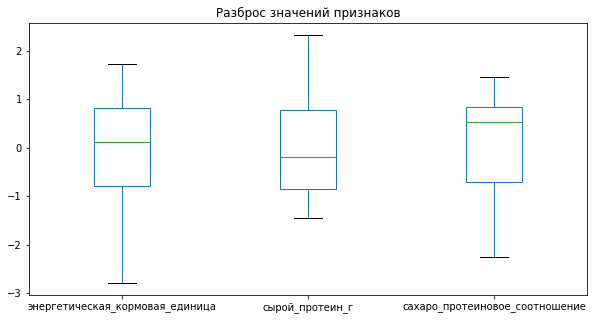

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

Возвелем 'квадрат_эке' в квадрат, для того чтобы была линейная зависимость

In [121]:
ferma_main['квадрат_эке'] = ferma_main['энергетическая_кормовая_единица'] ** 2
ferma_main['квадрат_эке']
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,квадрат_эке
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Приведем столбец 'сахаро_протеиновое_соотношение' в категориальное значение

In [122]:
ferma_main.loc[ferma_main['сахаро_протеиновое_соотношение'] >= 0.91, 'сахаро_протеиновое_соотношение'] = 1
ferma_main.loc[ferma_main['сахаро_протеиновое_соотношение'] < 0.91, 'сахаро_протеиновое_соотношение'] = 0
ferma_main['сахаро_протеиновое_соотношение']=ferma_main['сахаро_протеиновое_соотношение'].astype(int)
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,квадрат_эке
0,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Построим модель после проделанной работы

In [123]:
y = ferma_main['удой_кг']
X = ferma_main.drop(columns=['удой_кг', 'энергетическая_кормовая_единица','процент_жирности', 'процент_белка', 'вкус_молока'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#разбиение столбцов на категориальные и числовые

numeric_columns=['сырой_протеин_г','сахаро_протеиновое_соотношение','квадрат_эке']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст']

#преобразование категориальных данных

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)

#преобразование числовых данных

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

#обучение модели

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

#вывод r^2

r2 = r2_score(y_test, predictions) 
r2

0.8180879926867501

Коэффициент увеличился, на немного, но увеличилась

Вывод MAE

In [124]:
mae=mean_absolute_error(y_test, predictions)
mae

149.03965222364604

Вывод MSE

In [125]:
mse=mean_squared_error(y_test, predictions)
mse

37030.91131113696

Вывод RMSE

In [126]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


192.43417396901455

In [127]:
residuals = y_test - predictions

Построение гистограммы

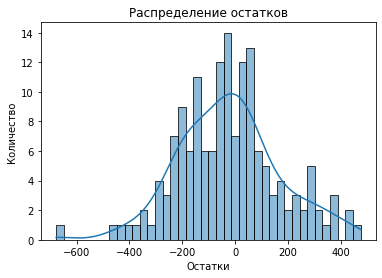

In [128]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Гистограмма сдвинулась вправо значит модель немного улучшилась

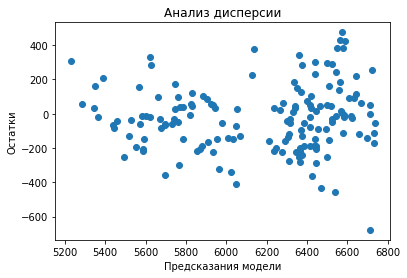

In [129]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

Text(0.5, 1.0, 'Разброс значений признаков')

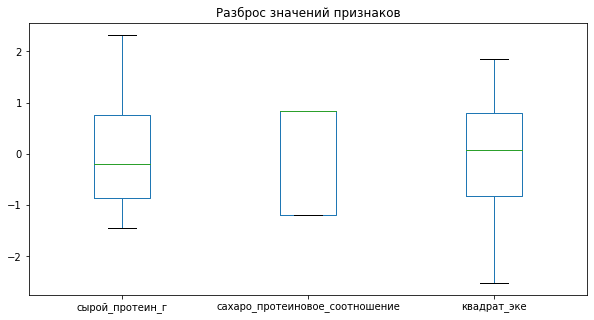

In [130]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

In [131]:
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,квадрат_эке
0,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


Далее будем строить модель по данным с именами отцов. \
Загрузим полученные ранее данные в актуальный датафрейм

In [132]:
ferma_main_dad['квадрат_эке']=ferma_main['квадрат_эке']
ferma_main_dad['сахаро_протеиновое_соотношение']=ferma_main['сахаро_протеиновое_соотношение']

Вывод информации для устранения ошибки (ошибка устранена)

In [133]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   удой_кг                          628 non-null    int64  
 1   энергетическая_кормовая_единица  628 non-null    float64
 2   сырой_протеин_г                  628 non-null    int64  
 3   сахаро_протеиновое_соотношение   628 non-null    int64  
 4   порода                           628 non-null    object 
 5   тип_пастбища                     628 non-null    object 
 6   порода_папы_быка                 628 non-null    object 
 7   процент_жирности                 628 non-null    float64
 8   процент_белка                    628 non-null    float64
 9   вкус_молока                      628 non-null    object 
 10  возраст                          628 non-null    object 
 11  квадрат_эке                      628 non-null    float64
dtypes: float64(4), int64(3

In [134]:
ferma_main.tail()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,квадрат_эке
624,6812,15.4,1964,1,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
625,5513,12.9,1700,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
626,5970,14.4,1837,0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
627,5746,13.8,1994,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44
628,6503,16.2,2283,1,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет,262.44


In [135]:
ferma_main_dad.tail()

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,имя_папы,квадрат_эке
624,625,6812,15.4,1964,1,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный,237.16
625,626,5513,12.9,1700,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин,166.41
626,627,5970,14.4,1837,0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин,207.36
627,628,5746,13.8,1994,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин,190.44
628,629,6503,16.2,2283,1,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет,Соловчик,262.44


In [136]:
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               628 non-null    int64  
 1   удой_кг                          628 non-null    int64  
 2   энергетическая_кормовая_единица  628 non-null    float64
 3   сырой_протеин_г                  628 non-null    int64  
 4   сахаро_протеиновое_соотношение   628 non-null    int64  
 5   порода                           628 non-null    object 
 6   тип_пастбища                     628 non-null    object 
 7   порода_папы_быка                 628 non-null    object 
 8   процент_жирности                 628 non-null    float64
 9   процент_белка                    628 non-null    float64
 10  вкус_молока                      628 non-null    object 
 11  возраст                          628 non-null    object 
 12  имя_папы              

In [137]:
ferma_main_dad.isnull().sum()

id                                 0
удой_кг                            0
энергетическая_кормовая_единица    0
сырой_протеин_г                    0
сахаро_протеиновое_соотношение     0
порода                             0
тип_пастбища                       0
порода_папы_быка                   0
процент_жирности                   0
процент_белка                      0
вкус_молока                        0
возраст                            0
имя_папы                           0
квадрат_эке                        0
dtype: int64

Проделаем подобную работу но в этот раз добавим имя отца

In [138]:
y = ferma_main_dad['удой_кг']
X = ferma_main_dad.drop(columns=['удой_кг', 'id', 'энергетическая_кормовая_единица','процент_жирности', 'процент_белка', 'вкус_молока'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#разбиение столбцов на категориальные и числовые

numeric_columns=['сырой_протеин_г','сахаро_протеиновое_соотношение','квадрат_эке']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст', 'имя_папы']

#преобразование категориальных данных

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])
encoder_col_names = encoder.get_feature_names_out(object_columns)

#преобразование числовых данных

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

#обучение модели

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

#вывод r^2

r2 = r2_score(y_test, predictions) 
r2

0.8247542745210406

Показатель улучшился

Вывод коэффициент MAE

In [139]:
mae=mean_absolute_error(y_test, predictions)
mae

146.16302445362325

Вывод коэффициент MSE

In [140]:
mse=mean_squared_error(y_test, predictions)
mse

35673.88988618196

Вывод коэффициент RMSE

In [141]:
rmse=mean_squared_error(y_test, predictions, squared=False)
rmse

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


188.87532895055924

In [142]:
residuals = y_test - predictions

Вывод гистограммы

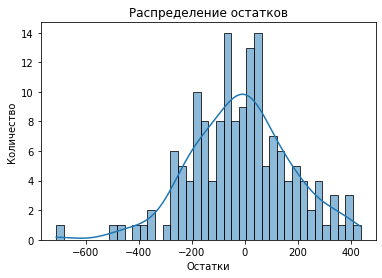

In [143]:
sns.histplot(data = residuals, bins = 40, kde=True)
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.title('Распределение остатков')  
plt.show()

Гистограмма показывает почти нормальное распределение

Построение точечной диаграммы

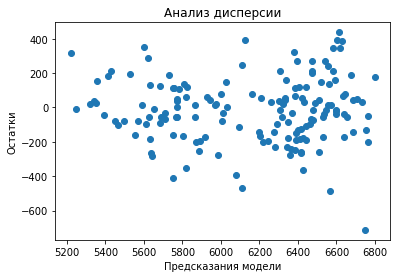

In [144]:
plt.scatter(predictions, residuals)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

Построение боксплота

Text(0.5, 1.0, 'Разброс значений признаков')

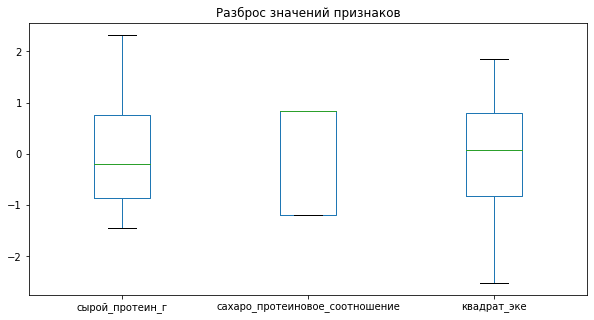

In [145]:
fig, ax = plt.subplots(figsize=(10, 5))
X_train[numeric_columns].plot(kind='box', ax=ax)
ax.set_title('Разброс значений признаков')

In [146]:
ferma_main.head()

,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,квадрат_эке
0,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84


In [147]:
cow_buy['энергетическая_кормовая_единица'] = ferma_main['энергетическая_кормовая_единица'].mean()*1.05
cow_buy['квадрат_эке']=cow_buy['энергетическая_кормовая_единица']**2
cow_buy['сырой_протеин_г']=ferma_main['сырой_протеин_г'].mean()*1.05
cow_buy['сахаро_протеиновое_соотношение']=ferma_main['сахаро_протеиновое_соотношение'].mean()*1.05
cow_buy.loc[cow_buy['сахаро_протеиновое_соотношение'] >= 0.91, 'сахаро_протеиновое_соотношение'] = 1
cow_buy.loc[cow_buy['сахаро_протеиновое_соотношение'] < 0.91, 'сахаро_протеиновое_соотношение'] = 0
cow_buy['сахаро_протеиновое_соотношение']=cow_buy['сахаро_протеиновое_соотношение'].astype(int)
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0


In [148]:
cow_buy['тип_пастбища']=cow_buy['тип_пастбища'].replace(['холмистое','равнинное'],['Холмистое', 'Равнинное'])

In [149]:
X = cow_buy.drop(['энергетическая_кормовая_единица','процент_жирности', 'процент_белка'], axis = 1)
X = X[['сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'квадрат_эке','имя_папы']]
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['сырой_протеин_г', 'сахаро_протеиновое_соотношение', 'квадрат_эке' ]

In [150]:
numeric_columns=['сырой_протеин_г','сахаро_протеиновое_соотношение','квадрат_эке']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст', 'имя_папы']

In [151]:
X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names_out(cat_col_names)

X_scaled = scaler.transform(X[num_col_names])
X_ohe = pd.DataFrame(X_ohe.toarray(), columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)
X = pd.concat([X_ohe, X_scaled], axis=1)

In [152]:
predictions = model_lr.predict(X)
cow_buy['удой_кг_прогноз'] = predictions
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0,6024.931199
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0,6239.309548
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,6188.366237


Доверительный интервал

In [153]:
confidence_level = 0.95
mean = np.mean(predictions)
sem = st.sem(predictions)
interval = st.norm.interval(confidence_level, loc=mean, scale=sem)
interval

(6039.930140027853, 6168.46811164722)

<b>Вывод:</b> Третья модель показала лучшие результаты среди трех обученных моделей. Гистограмма ошибок и коэффициенты третий модели были лучше, что указывает на более стабильное и качественное распределение ошибок, правильность модели.\
Был спрогнозирован удов продаваемых коров. (в рифму)

## Обучение модели логистической регрессии

Переведем столбик 'вкус_молока' в двоичную систему

In [154]:
ferma_main_dad['вкус_молока']=ferma_main_dad['вкус_молока'].replace(['вкусно','не вкусно'],['1', '0'])

Просмотр уникальных значений

In [155]:
ferma_main_dad['вкус_молока'].unique()

array(['1', '0'], dtype=object)

In [156]:
ferma_main_dad

,id,удой_кг,энергетическая_кормовая_единица,сырой_протеин_г,сахаро_протеиновое_соотношение,порода,тип_пастбища,порода_папы_быка,процент_жирности,процент_белка,вкус_молока,возраст,имя_папы,квадрат_эке
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,Буйный,201.64
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,Соловчик,163.84
2,3,5810,14.0,1854,0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,Барин,196.00
3,4,5895,12.4,2012,0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,Буйный,153.76
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,Барин,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,0,более_2_лет,Буйный,237.16
625,626,5513,12.9,1700,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,1,менее_2_лет,Барин,166.41
626,627,5970,14.4,1837,0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,0,более_2_лет,Барин,207.36
627,628,5746,13.8,1994,0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,1,более_2_лет,Барин,190.44


Разделение данных (я решил оставить все что качается питания, могу предположить что еда влияет на вкус молока)

In [157]:
y = ferma_main_dad['вкус_молока']
X = ferma_main_dad.drop(columns=['вкус_молока','id', 'энергетическая_кормовая_единица', 'удой_кг'])
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
) 

Разделение столбцов

In [158]:
numeric_columns=['сырой_протеин_г','сахаро_протеиновое_соотношение', 'процент_жирности','процент_белка', 'квадрат_эке']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст', 'имя_папы']

Предобработка данных

In [159]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
X_train_ohe = encoder.fit_transform(X_train[object_columns])
X_test_ohe = encoder.transform(X_test[object_columns])

Преобразование данных

In [160]:
encoder_columns = encoder.get_feature_names_out(object_columns)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=encoder_columns)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=encoder_columns)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучение модели

In [161]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train) 

Вывод точности предсказания

In [162]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6305732484076433

In [163]:
recall_score(y_test, y_pred, pos_label='1')

0.8636363636363636

In [164]:
precision_score(y_test, y_pred, pos_label='1')

0.6229508196721312

Построим матрицу ошибки. Для заказчика критично, чтобы не покупать коров, дающих невкусное молоко. И нам нужно чтобы precision была 100%

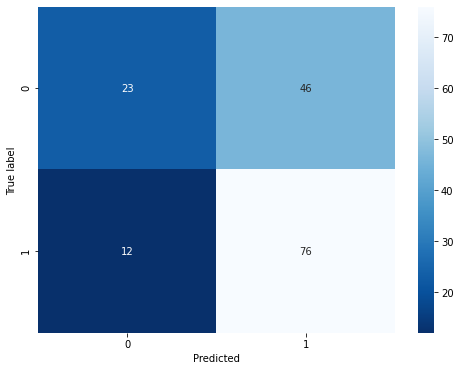

In [165]:
cm = confusion_matrix(y_test, y_pred, labels=['0', '1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Модель показывает коээфициент равен 46 поэтому нам нужно настроить порог классификации так, то есть чтобы все предсказанные как "вкусное" молоко действительно были таковыми. Это минимизирует ошибку первого рода (ложноположительные результаты).

In [166]:
y_pred=y_pred.astype(int)

In [167]:
threshold = 0
y_pred_thresholded = (y_pred >= threshold).astype(int)

In [168]:
y_test=y_test.astype(int)

In [170]:
threshold = 0.5
while True:
    threshold += 0.01
    y_pred_thresholded = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
    if (precision_score(y_test, y_pred_thresholded) == 1): break
threshold

0.8100000000000003

In [171]:
y_pred_thresholded = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)

После установки порога построим опять матрицу ошибок

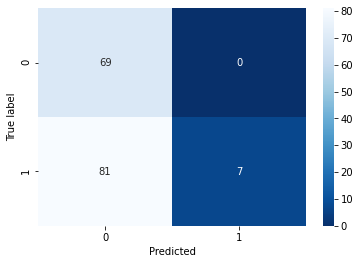

In [172]:
cm = confusion_matrix(y_test, y_pred_thresholded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Ошибка первого рода приняла значение 0. То что мы и хотели

Вывод точности предсказания

In [173]:
accuracy_score(y_test, y_pred_thresholded)

0.4840764331210191

In [174]:
recall_score(y_test, y_pred_thresholded)

0.07954545454545454

In [175]:
precision_score(y_test, y_pred_thresholded)

1.0

In [176]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0,6024.931199
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0,6239.309548
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,6188.366237
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0,6071.600389
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0,6217.479908
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0,6046.760839


Предсказание вкуса молока у коров которые мы хотим купить

In [177]:
numeric_columns=['сырой_протеин_г','сахаро_протеиновое_соотношение', 'процент_жирности','процент_белка', 'квадрат_эке']
object_columns=['порода','тип_пастбища','порода_папы_быка','возраст', 'имя_папы']

In [178]:
cow_buy_ohe = encoder.transform(cow_buy[object_columns])
encoder_object_columns = encoder.get_feature_names_out(object_columns)
cow_buy_scaled = scaler.transform(cow_buy[numeric_columns])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe.toarray(), columns=encoder_object_columns)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=numeric_columns)
X = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

In [179]:
predictions = (clf.predict_proba(X)[:,1] >= threshold).astype(int)
cow_buy['вкус_молока_прогноз'] = predictions
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == 1, 'вкус_молока_прогноз'] = 'вкусное'
cow_buy.loc[cow_buy['вкус_молока_прогноз'] == 0, 'вкус_молока_прогноз'] = 'не вкусное'
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0,6024.931199,не вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0,6239.309548,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,6188.366237,не вкусное
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0,6071.600389,не вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0,6217.479908,не вкусное
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946,не вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0,6046.760839,вкусное


In [180]:
cow_buy.loc[cow_buy['вкус_молока_прогноз']=='вкусное']

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0,6046.760839,вкусное
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,233.361138,2019.947532,0,5990.928031,вкусное


<b>Вывод:</b>

На этом этапе проекта мы разработали и обучили модель логистической регрессии, которая предназначена для классификации вкуса молока на основе предоставленных данных. После обучения модели, мы провели оценку её эффективности, рассчитав различные метрики.

Важным аспектом для нас было устранение ошибок первого рода, то есть ситуаций, когда модель ошибочно предсказывает, что молоко имеет неприемлемый вкус. Для достижения этой цели, мы настроили пороговое значение вероятности, при котором решение о классе принимается моделью.

В результате, наша модель успешно предсказала вкус молока, обеспечив высокую точность и минимизировав риск ошибочных отрицательных прогнозов. Это позволило нам удовлетворить требования заказчика.

## Итоговые выводы

In [181]:
cow_buy.loc[(cow_buy['удой_кг_прогноз'] > 6000) & (cow_buy['вкус_молока_прогноз'] == "вкусное")]

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0,6046.760839,вкусное


In [182]:
new_rows = cow_buy.loc[(cow_buy['удой_кг_прогноз'] > 6000) & (cow_buy['вкус_молока_прогноз'] == "вкусное")]
cow_buy = pd.concat([cow_buy, new_rows], ignore_index=True)
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,процент_жирности,процент_белка,возраст,энергетическая_кормовая_единица,квадрат_эке,сырой_протеин_г,сахаро_протеиновое_соотношение,удой_кг_прогноз,вкус_молока_прогноз
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,233.361138,2019.947532,0,6024.931199,не вкусное
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946,не вкусное
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0,6239.309548,не вкусное
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,6188.366237,не вкусное
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0,6071.600389,не вкусное
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0,6256.139468,вкусное
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0,6217.479908,не вкусное
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,233.361138,2019.947532,0,5930.219946,не вкусное
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,233.361138,2019.947532,0,6046.760839,вкусное


<b>Вывод :</b>В ходе проведенного исследования была успешно решена задача выбора оптимальных коров для покупки фермером, с учетом критериев высокой молочной продуктивности (свыше 6000 литров) и вкуса молока. Это позволило минимизировать финансовые риски и обеспечить максимальную отдачу от инвестиций в животноводство.

Для улучшения качества прогнозирования и классификации, были применены такие методы как: стандартизация, кодирование категориальных признаков и установка пороговых значений для модели, что в конечном итоге повысило ее эффективность и надежность.

Анализ экономических рисков и метрика precision оказался крайне важным для управления ошибками первого рода, что способствовало минимизации потенциальных экономических убытков. Этот подход обеспечил более точную оценку и управление процессами на ферме.

В рамках работы были изучены и проанализированы несколько датафреймов, которые были тщательно очищены от дубликатов и пропусков. Визуализация данных с помощью гистограмм, круговых диаграмм и графиков зависимостей, а также расчет коэффициентов корреляции позволили выявить ключевые факторы, влияющие на продуктивность и качество молока.

Обучение трех моделей линейной регрессии и одной модели логистической регрессии позволило не только улучшить точность прогнозов, но и получить более глубокое понимание процессов, влияющих на выбранные параметры коров. Эти модели стали  инструментом для принятия обоснованных решений в управлении фермерским хозяйством.

В заключение, проведенное исследование предоставило фермеру эффективные инструменты для принятия решений, минимизации рисков и оптимизации производственных процессов, что в конечном итоге приведет к улучшению экономических показателей и повышению общей продуктивности фермы.